In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

### 데이터 읽어오기

In [2]:
# tsv파일은 sep = '\t' 구분자를 tab으로 줘야함
chipo = pd.read_csv('data10/chipotle.tsv', sep='\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
# 데이터 프레임 정보확인
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [4]:
# 결측치 확인
chipo.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [5]:
# 컬럼명 확인
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [6]:
# 인덱스 확인
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### 요약 통계 정보를 확인해 본다.

In [7]:
# 숫자 데이터에 대한 요약 통계 정보
# count : 결측치를 제외한 로우의 개수
# mean : 결측치를 제외한 평균
# std : 결측치를 제외한 표준편차

chipo[['order_id','quantity']].describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [8]:
# 문자열 컬럼의 요약 통계 정보
# unique : 중복을 제외한 문자열 종류 개수 (저장된 값의 종류)
# freq : top에 있는 문자열이 몇번 나왔는지

chipo[['item_name','choice_description','item_price']].describe()

,item_name,choice_description,item_price
count,4622,3376,4622
unique,50,1043,78
top,Chicken Bowl,[Diet Coke],$8.75
freq,726,134,730


### 레이블형 데이터의 데이터 종류 수 출력

In [9]:
# 중복을 제외하고 가져온다.

chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [10]:
len(chipo['item_name'].unique())

50

### 가장 많이 주문한 item 파악하기

In [11]:
# 상품 이름 컬럼에 값이 몇개씩 저장되어 있는지 가지고 온다.
item_count = chipo['item_name'].value_counts()

# 상위 10개만 추출
item_count = item_count[:10]
item_count

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [12]:
# 가장 많이 주문한 음식을 가져온다.
a1 = chipo['item_name'].value_counts().index[0]
print(f'가장 많이 주문한 음식 : {a1}')

가장 많이 주문한 음식 : Chicken Bowl


### item당 주문 개수와 총량을 구한다.
- groupby 사용

In [13]:
# item당 주문 개수를 가져온다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count.sort_values(ascending = False)[:10]

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Steak Bowl             211
Chips                  211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: order_id, dtype: int64

In [14]:
# item당 주문 총량을 출력한다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity.sort_values(ascending = False)[:10]

item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

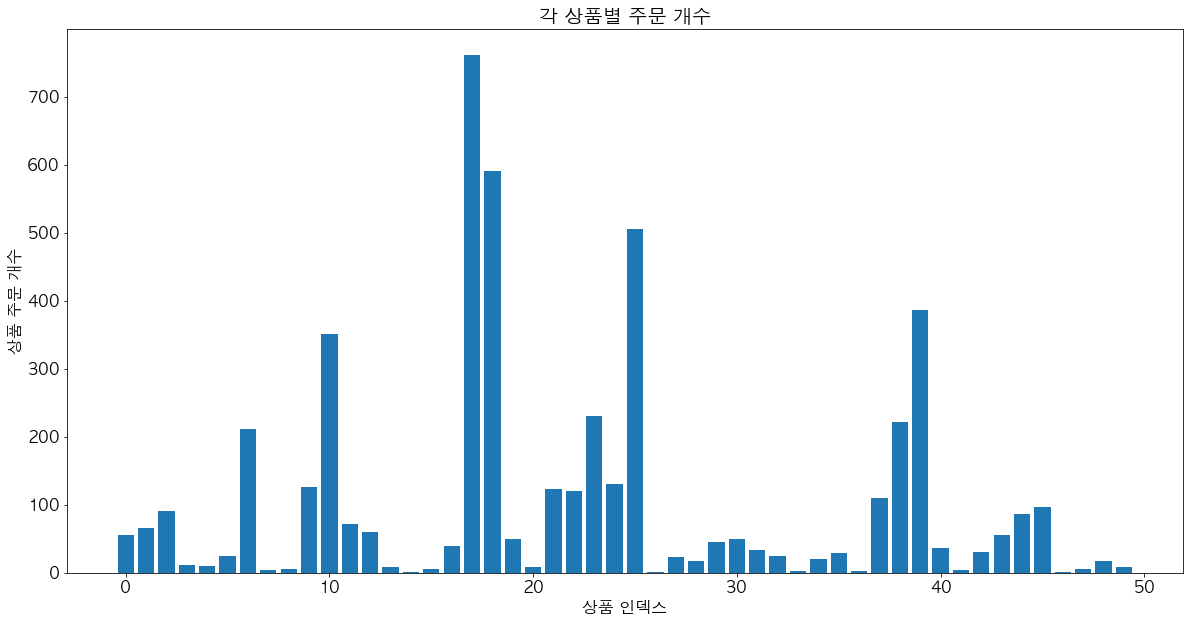

In [15]:
# 값을 리스트로 추출한다.
item_name_list = item_quantity.index.tolist()

# x축 (상품의 개수만큼 값이 들어있는 range)
x_pos = np.arange(len(item_name_list))

# 상품별 주문 개수
order_cnt = item_quantity.values.tolist()

# 시각화
plt.bar(x_pos, order_cnt, align='center')
plt.xlabel('상품 인덱스')
plt.ylabel('상품 주문 개수')
plt.title('각 상품별 주문 개수')
plt.show()

### apply와 lambda 함수를 이용한 데이터 전처리

In [16]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [17]:
# 상품 가격 출력
chipo['item_price']

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

In [18]:
# 컬럼 단위 데이터에 apply 함수를 통해 전처리를 한다.
chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


### 문제
- 주문당 평균 계산 금액 출력
- 한 주문에 10달러 이상 사용한 주문의 id를 출력
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇개 팔렸는지
- 'Veggie Salad Bowl'이 몇번 주문 되었는지
- 'Chicken Bowl'을 2개 이상 주문한 주문 횟수 구하기

In [19]:
# tsv파일은 sep = '\t' 구분자를 tab으로 줘야함
chipo = pd.read_csv('data10/chipotle.tsv', sep='\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


#### 1. 주문당 평균 계산 금액 출력

In [20]:
# 컬럼 단위 데이터에 apply 함수를 통해 전처리를 한다.
# 금액을 float 형태로 변환

chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [50]:
# 'order_id'로 groupby 후 
# 주문당 총합에서 평균을 구함

chipo.groupby('order_id')['item_price'].sum().mean()

18.81142857142869

#### 1번 강사님 풀이

In [29]:
# item_name이 Chicken Bowl 가져온다.
chipo.query('item_name == "Chicken Bowl"').head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49


In [47]:
# choice_description 결측치인 것들만 가져온다.
a1 = chipo['choice_description'].isna()
a2 = chipo[a1]

# quantity가 두개이고 item_name 
a3 = a2.query('quantity == 2 and item_name == "Chips"')
display(a3)

# quantity가 한개인 것을 가져온다.
a4 = a2.query('quantity == 1 and item_name == "Chips"')
display(a4)

,order_id,quantity,item_name,choice_description,item_price
223,98,2,Chips,NaN,4.3
828,343,2,Chips,NaN,4.3
1301,530,2,Chips,NaN,4.3
1600,648,2,Chips,NaN,4.3
1605,649,2,Chips,NaN,4.3
1850,750,2,Chips,NaN,4.3
1900,766,2,Chips,NaN,4.3
2112,850,2,Chips,NaN,4.3
2258,909,2,Chips,NaN,4.3
2343,934,2,Chips,NaN,4.3


,order_id,quantity,item_name,choice_description,item_price
40,19,1,Chips,NaN,2.15
59,27,1,Chips,NaN,2.15
77,34,1,Chips,NaN,2.15
80,35,1,Chips,NaN,2.15
208,92,1,Chips,NaN,2.15
...,...,...,...,...,...
4505,1791,1,Chips,NaN,2.15
4509,1793,1,Chips,NaN,1.99
4525,1799,1,Chips,NaN,2.15
4584,1823,1,Chips,NaN,2.15


Chips가 추가 주문이 없을 경우 1개 주문하면 2.15달러이고 2개 주문하면 4.3달러이다. (이 과정을 통해 데이터를 파악할 수 있다.)

따라서 item_price 컬럼은 상품 가격에 quantity를 곱한 값이 된다.

In [48]:
# 주문당 평균을 구한다.
chipo.groupby('order_id')['item_price'].mean()

order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: item_price, Length: 1834, dtype: float64

In [61]:
# 주문당 총합을 구한다.
chipo.groupby('order_id')['item_price'].sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [62]:
# 두가지 정보를 한번에 볼수 있게 해줌 .agg
chipo.groupby('order_id')['item_price'].agg(['sum','mean'])

,sum,mean
order_id,,
1,11.56,2.890000
2,16.98,16.980000
3,12.67,6.335000
4,21.00,10.500000
5,13.70,6.850000
...,...,...
1830,23.00,11.500000
1831,12.90,4.300000
1832,13.20,6.600000


---

#### 2. 한 주문에 20달러 이상 사용한 주문의 id를 출력

In [57]:
chipo.query('item_price > 20')['order_id'].unique()[:10]

array([ 60,  94, 123, 152, 178, 193, 212, 229, 243, 253])

#### 2번 강사님 풀이

In [58]:
# 각 주문별 총 주문 금액을 구한다.
a1 = chipo.groupby('order_id')['item_price'].sum()
a1

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [59]:
# 주문 총 금액이 20달러보다 큰지 확인한다.
a2 = a1 >= 20
a2

order_id
1       False
2       False
3       False
4        True
5       False
        ...  
1830     True
1831    False
1832    False
1833     True
1834     True
Name: item_price, Length: 1834, dtype: bool

In [63]:
a3 = a1[a2]
a3.index

Int64Index([   4,   18,   20,   21,   26,   28,   30,   34,   40,   43,
            ...
            1811, 1812, 1822, 1824, 1825, 1827, 1829, 1830, 1833, 1834],
           dtype='int64', name='order_id', length=589)

---

#### 3. 각 아이템의 가격 구하기

In [23]:
chipo_qu1 = chipo[chipo['quantity'] == 1]

In [24]:
# 컬럼 내의 중복값을 제거 후 마지막만 남김 (.drop_duplicates("item_name", keep="last"))
chipo_item_price = chipo_qu1[['item_name','item_price']].drop_duplicates("item_name", keep="last")

In [25]:
# 인덱스 번호 초기화
chipo_item_price = chipo_item_price.reset_index(drop=True)

In [26]:
chipo_item_price.head()

,item_name,item_price
0,Crispy Tacos,7.4
1,Bowl,7.4
2,Chips and Mild Fresh Tomato Salsa,3.0
3,Burrito,7.4
4,Salad,7.4


#### 3번 강사님 풀이

In [66]:
# 상품의 종류 개수를 가져온다.
a1 = chipo['item_name'].value_counts()
len(a1.index)

50

In [69]:
# 한개만 팔린 상품의 종류 개수를 가져온다.
a1 = chipo.query('quantity == 1')
a2 = a1['item_name'].value_counts()
len(a2)

50

1개만 팔린 상품 목록안에 모든 상품들이 포함되어 있다.

In [75]:
# 1개만 팔린 상품 목록을 가져온다.
chipo_one_item = chipo.query('quantity == 1')
chipo_one_item.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98


In [77]:
# 과연 한가지 상품의 가격은 모두 동일한지 확인한다.
a1 = chipo_one_item.query('item_name == "Chips and Fresh Tomato Salsa"')
a2 = a1['item_price']
a2.value_counts()

2.95    66
2.39    36
2.29     3
Name: item_price, dtype: int64

In [82]:
# 동일하지 않는 원인을 확인해본다.
# 추가 주문이 없는 것들만 확인한다.
# 1개만 주문한 가격중에 추가 주문이 없는 것들

a3 = a1['choice_description'].isna()
a4 = a1[a3]
a5 = a4['item_price']
a5.value_counts()

2.95    66
2.39    36
2.29     3
Name: item_price, dtype: int64

In [87]:
# 하나의 상품에 대해 여러가지 값이 존재하는 상황이므로 최소값으로 구한다.
# 각 상품별 최소값을 구한다.

a1 = chipo_one_item.groupby('item_name').min()
price_per_item = a1['item_price']
price_per_item[:10]

item_name
6 Pack Soft Drink        6.49
Barbacoa Bowl            8.69
Barbacoa Burrito         8.69
Barbacoa Crispy Tacos    8.99
Barbacoa Salad Bowl      9.39
Barbacoa Soft Tacos      8.99
Bottled Water            1.09
Bowl                     7.40
Burrito                  7.40
Canned Soda              1.09
Name: item_price, dtype: float64

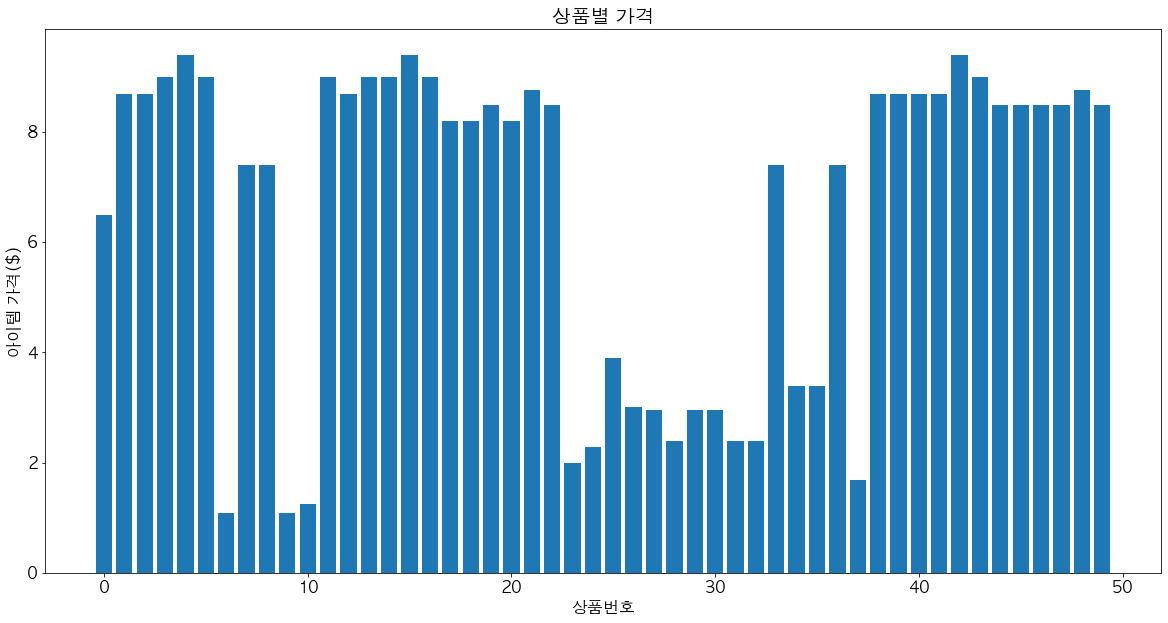

In [92]:
# 아이템 가격 분포 그래프를 출력한다.
# 상품의 이름을 가져온다.
item_name_list = price_per_item.index

# 상품의 이름의 수 만큼 들어있는 리스트를 생성한다.
x_pos = np.arange(len(item_name_list))

# 가격
item_price = price_per_item.values

# 시각화
plt.bar(x_pos, item_price, align='center')
plt.ylabel('아이템 가격($)')
plt.xlabel('상품번호')
plt.title('상품별 가격')
plt.show()


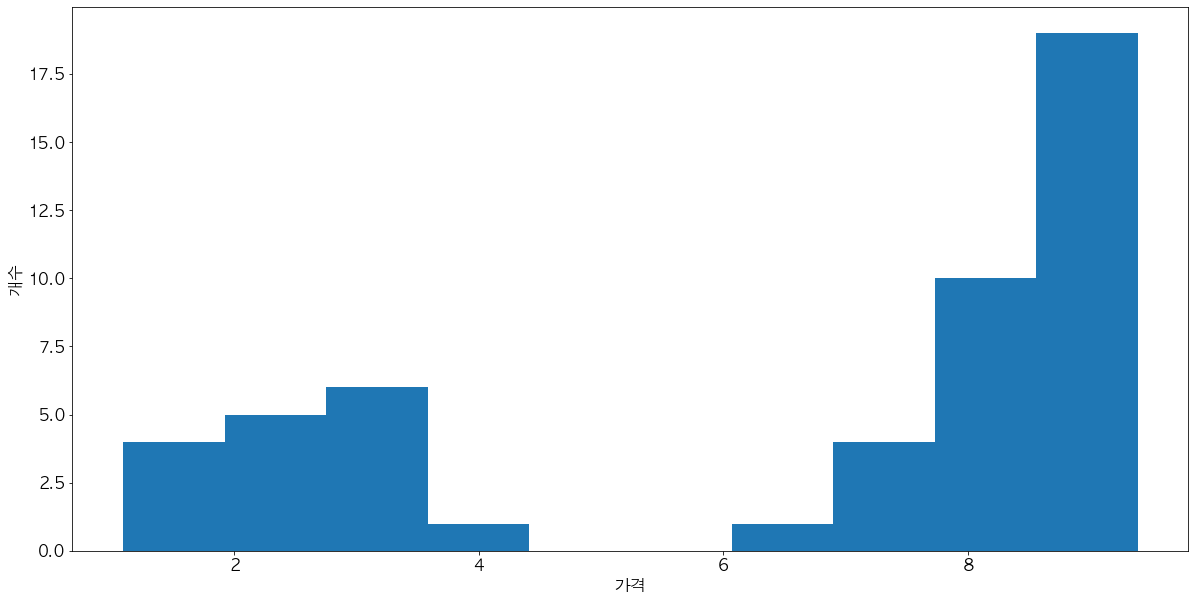

In [90]:
# 아이템 가격 히스토그램
# 중간가격을 기준으로 비율을 확인
plt.hist(item_price)
plt.ylabel('개수')
plt.xlabel('가격')
plt.show()

---

#### 4. 가장 비싼 주문에서 item이 몇개 팔렸는지

In [27]:
# 가장 비싼 금액, 주문 파악하기
price_max = chipo_item_price['item_price'].max()
chipo[chipo['item_price'] == price_max].groupby('item_name').sum()['quantity']

item_name
Barbacoa Salad Bowl     5
Carnitas Salad Bowl     4
Steak Salad Bowl       17
Name: quantity, dtype: int64

#### 4번 강사님 풀이

In [94]:
# 데이터 프레임 확인
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [95]:
# order_id를 기준으로 총합을 구한다.
a1 = chipo.groupby('order_id').sum()
a1

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


In [96]:
# 총 가격을 기준으로 정렬한다.
a2 = a1.sort_values(by='item_price', ascending=False)
a2

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
...,...,...
17,2,10.08
889,2,10.08
1014,2,10.08


In [98]:
# 인덱스로 있는 주문번호를 데이터로 포함 시키기 위해 인덱스를 재정의
a3 = a2.reset_index()
a3

,order_id,quantity,item_price
0,926,23,205.25
1,1443,35,160.74
2,1483,14,139.00
3,691,11,118.25
4,1786,20,114.30
...,...,...,...
1829,17,2,10.08
1830,889,2,10.08
1831,1014,2,10.08
1832,1303,2,10.08


In [99]:
a4 = a3.iloc[0]
a4

order_id      926.00
quantity       23.00
item_price    205.25
Name: 0, dtype: float64

In [100]:
# 'Veggie Salad Bowl'이 몇번 주문 되었는지
# 'Veggie Salad Bowl' 주문 내역을 가져온다.

chipo_salad = chipo.query('item_name == "Veggie Salad Bowl"')
chipo_salad

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


In [101]:
print(f'총 주문 횟수 : {len(chipo_salad)}')

총 주문 횟수 : 18


#### "Chicken Bowl"을 주문한 주문 건을 가져온다.

In [102]:
# Chicken Bowl을 주문한 주문건을 가져온다.
a1 = chipo.query('item_name == "Chicken Bowl"')
a1

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49
...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75


In [106]:
# 2개 이상 주문한 주문건을 가져온다.
a2 = a1.query('quantity >= 2')
a2.head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50


In [107]:
print(f'총 주문 횟수 : {len(a2)}')

총 주문 횟수 : 33
